In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
reviews = pd.read_csv('/content/drive/MyDrive/E_commerce_reviews/E-Commerce_Data/Womens Clothing E-Commerce Reviews.csv.zip')
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
display(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


None

In [4]:
display(reviews.describe())

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
display(reviews.dtypes)

,0
Unnamed: 0,int64
Clothing ID,int64
Age,int64
Title,object
Review Text,object
Rating,int64
Recommended IND,int64
Positive Feedback Count,int64
Division Name,object
Department Name,object


In [6]:
reviews.drop(['Unnamed: 0'], axis=1, inplace=True)

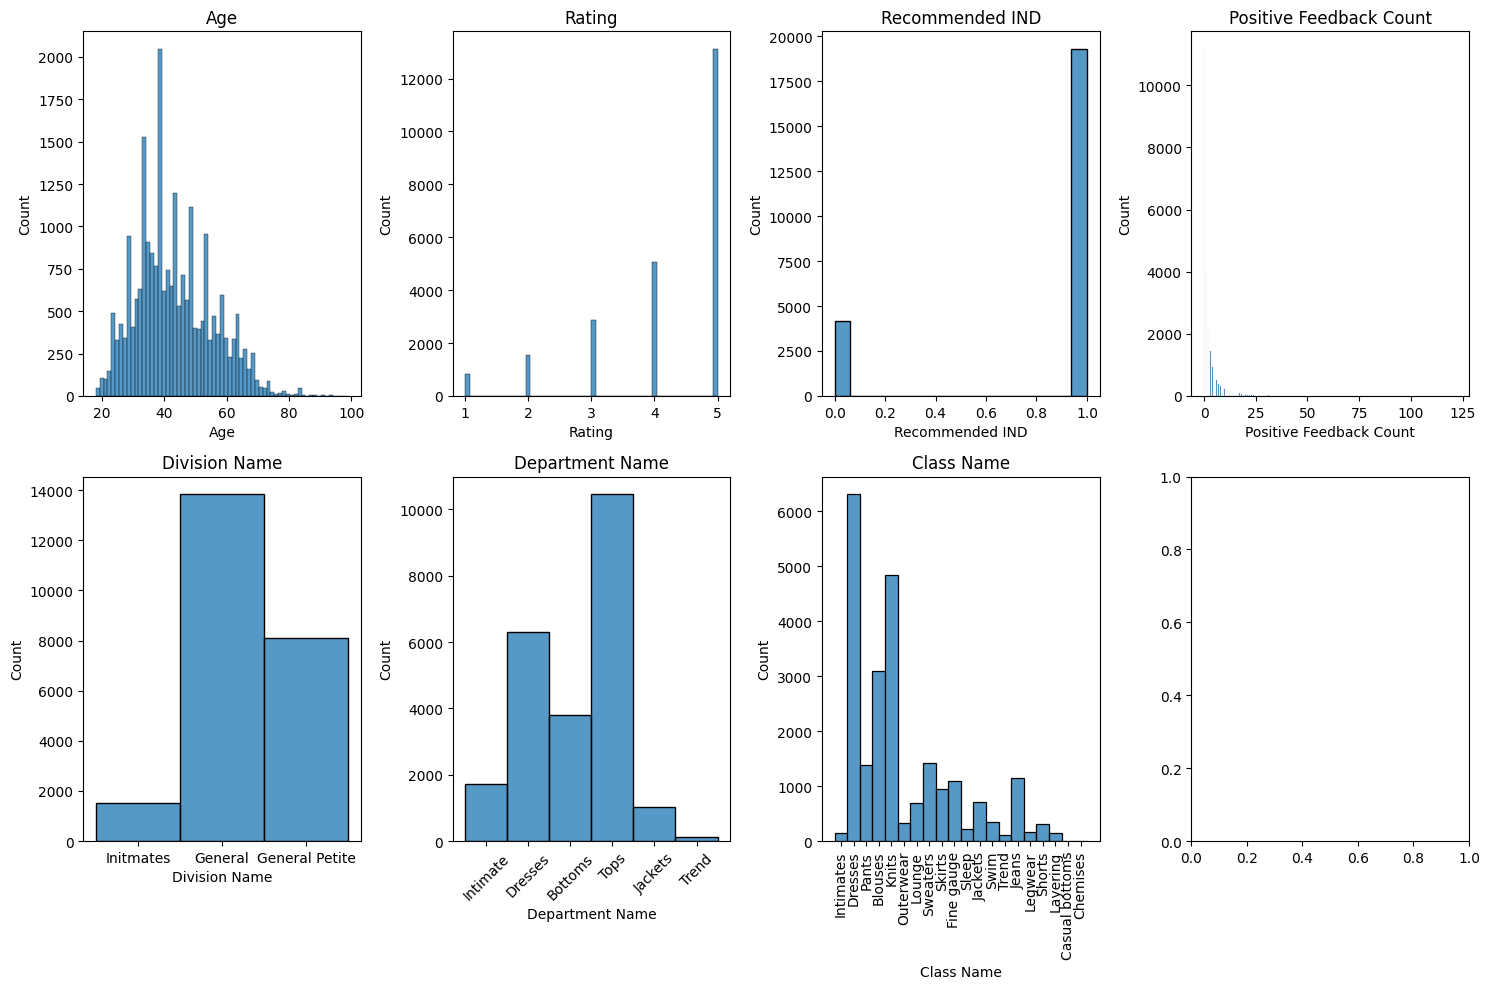

In [7]:
distribution_cols = ['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for i, col in enumerate(distribution_cols):
    sns.histplot(data=reviews, x=col, ax=axes[i//4, i%4])
    if (col == 'Department Name'):
        axes[i//4, i%4].tick_params(axis='x', rotation=45)
        plt.tight_layout()
    if (col == 'Class Name'):
        axes[i//4, i%4].tick_params(axis='x', rotation=90)
        plt.tight_layout()
    axes[i//4, i%4].set_title(col)
plt.tight_layout();
plt.show();

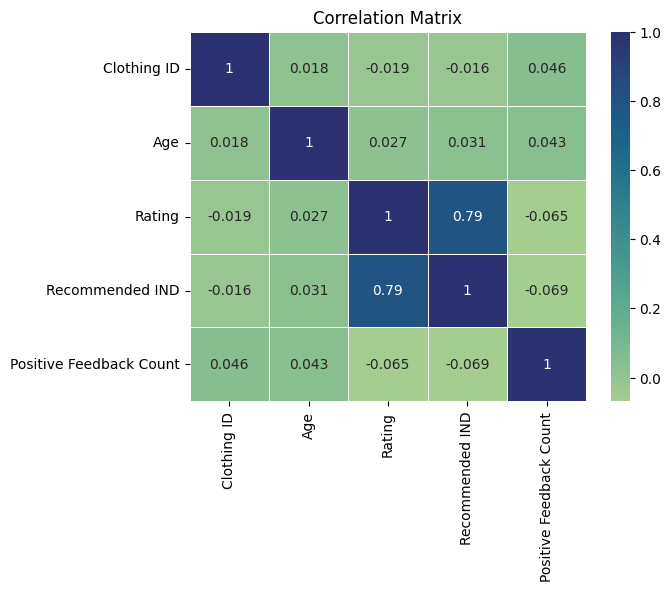

In [8]:
corr_mat = reviews.corr(numeric_only = True)
sns.heatmap(corr_mat, annot = True, cmap = 'crest', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show();

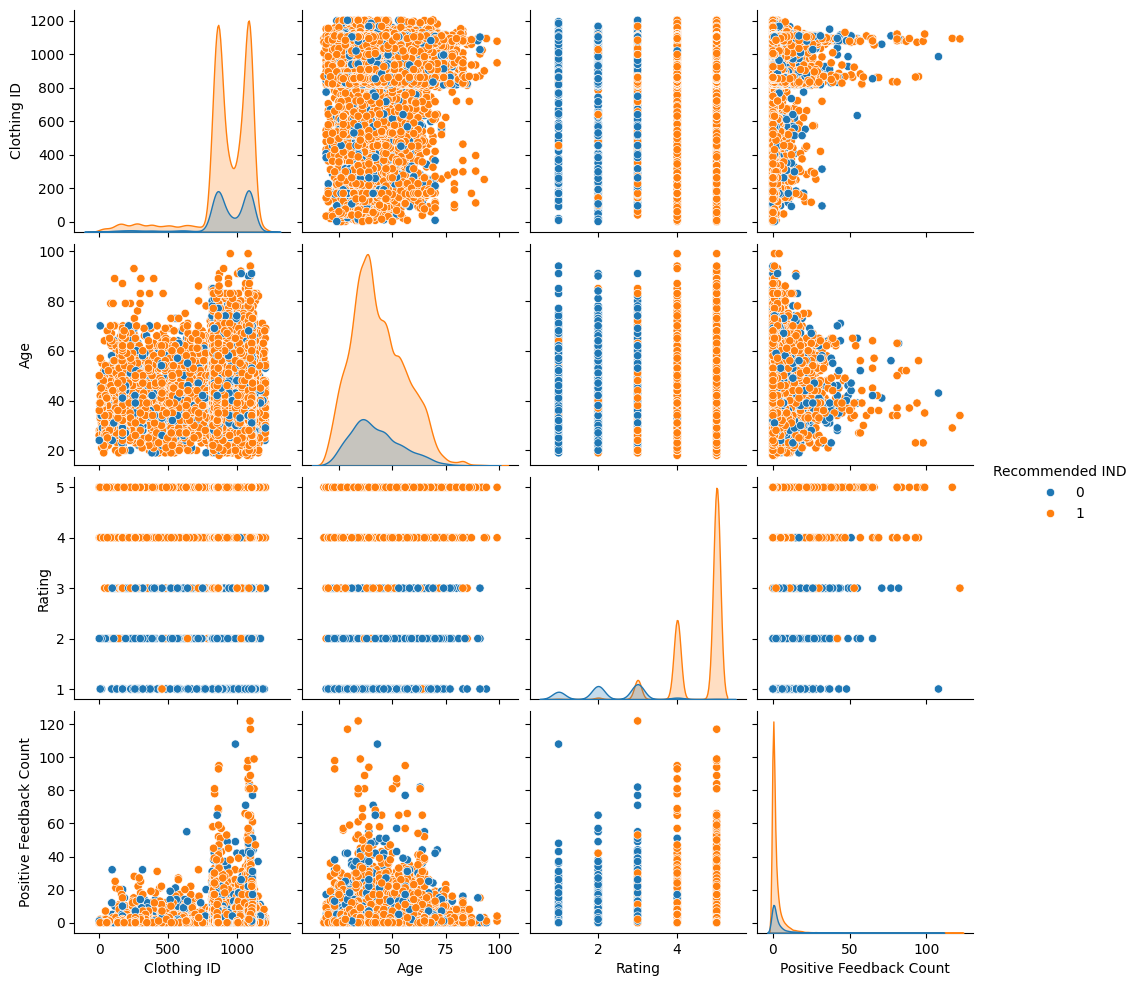

In [9]:
sns.pairplot(reviews, hue = 'Recommended IND')
plt.show();

Combining the text column.

In [10]:
reviews['Text'] = reviews['Title'] + " " + reviews['Review Text']
# Removing trailing, or ending spaces.
reviews['Text'] = reviews['Text'].str.strip()

In [11]:
# Removing unnecessary columns.
reviews.drop(columns=[ 'Clothing ID', "Title", "Review Text","Positive Feedback Count"], axis=1, inplace=True)

In [12]:
reviews.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text
0,33,4,1,Initmates,Intimate,Intimates,NaN
1,34,5,1,General,Dresses,Dresses,NaN
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [13]:
# check for missing values
print(reviews.isnull().sum().sort_values(ascending=False))
print("==========Duplicates==========")
# check for duplicates
print(reviews.duplicated().sum())
# remove missing values
reviews.dropna(inplace=True)
# remove duplicates
reviews.drop_duplicates(inplace=True)

Text               3811
Division Name        14
Department Name      14
Class Name           14
Recommended IND       0
Age                   0
Rating                0
dtype: int64
==========Duplicates==========
1850


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19659 entries, 2 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              19659 non-null  int64 
 1   Rating           19659 non-null  int64 
 2   Recommended IND  19659 non-null  int64 
 3   Division Name    19659 non-null  object
 4   Department Name  19659 non-null  object
 5   Class Name       19659 non-null  object
 6   Text             19659 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.2+ MB


Now, this dataset contains `19659` customer reviews!
- The features include: `Age`, `Rating`, `Recommended IND`, `Positive Feedback Count`, `Division Name`, `Department Name`, `Class Name`, and `Text`.

In [15]:
reviews.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,49,2,0,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...
6,39,5,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...


Re-Visualizing some distributions.

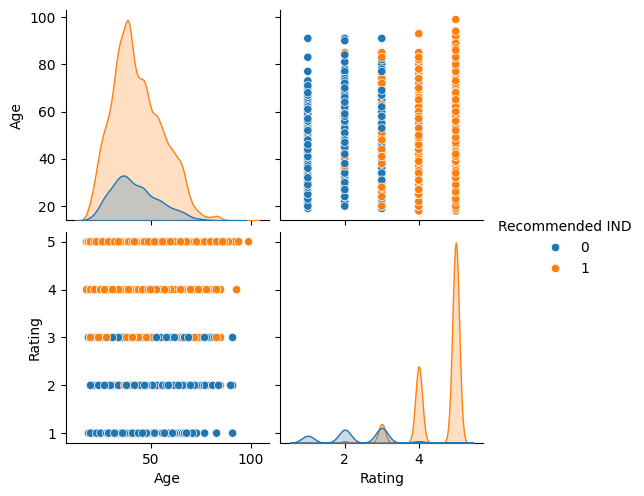

In [16]:
sns.pairplot(reviews, hue = 'Recommended IND')
plt.show();

Now, we individually view these distributions

Minimum age: 18
Maximum age: 99
Average age: 43.26171219288875
Median age: 41.0


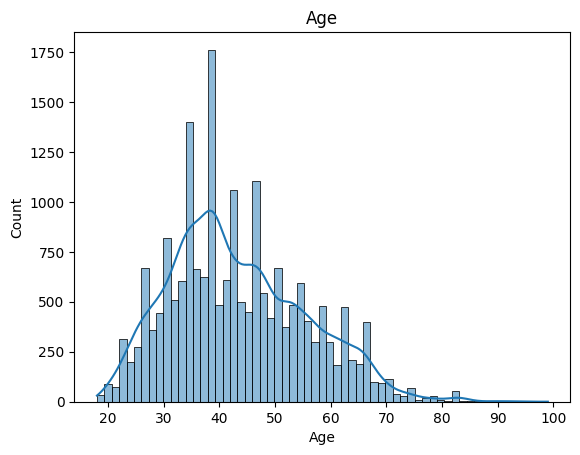

In [17]:
# Age
# print minimum, maximum, average, median age
print("Minimum age:", reviews["Age"].min())
print("Maximum age:", reviews["Age"].max())
print("Average age:", reviews["Age"].mean())
print("Median age:", reviews["Age"].median())
sns.histplot(data=reviews, x='Age', kde = True)
plt.title('Age')
plt.show();

We see that the distribution of ages is skewed to the right. Most of the reviews belong to the age group of 30-40, with a declining trend after ~50 years.

Minimum rating: 1
Maximum rating: 5
Average rating: 4.18302049951676
Median rating: 5.0


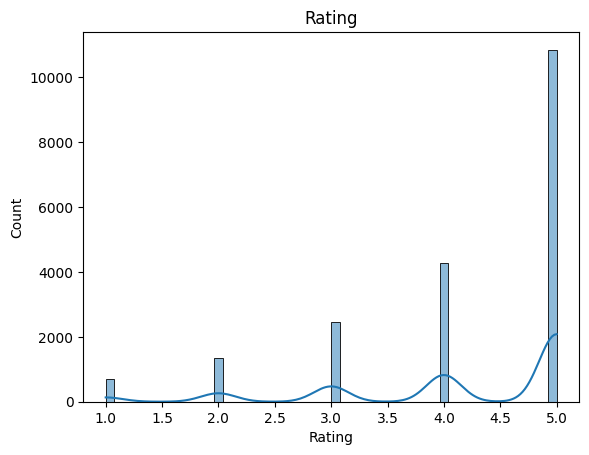

In [18]:
# Ratings
print("Minimum rating:", reviews["Rating"].min())
print("Maximum rating:", reviews["Rating"].max())
print("Average rating:", reviews["Rating"].mean())
print("Median rating:", reviews["Rating"].median())
sns.histplot(data=reviews, x='Rating', kde = True)
plt.title('Rating')
plt.show();

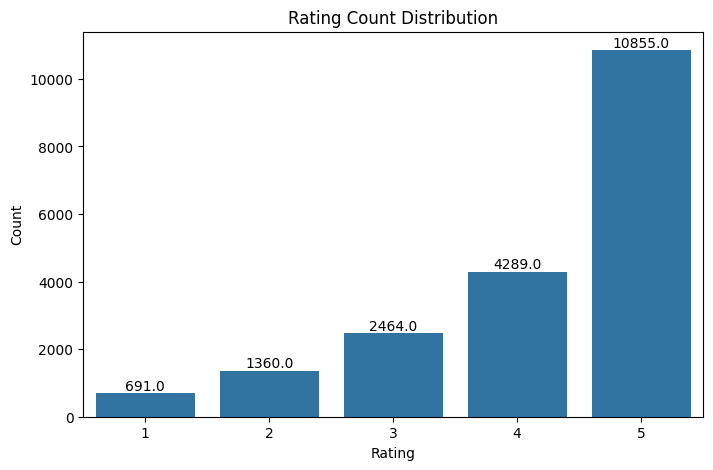

In [19]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=reviews['Rating'])

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Rating Count Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show();

Majority of the ratings seem to be 5 start at `~11000`, with the preceeding columns approximately halfing everytime. This implies that the data is positively biased.

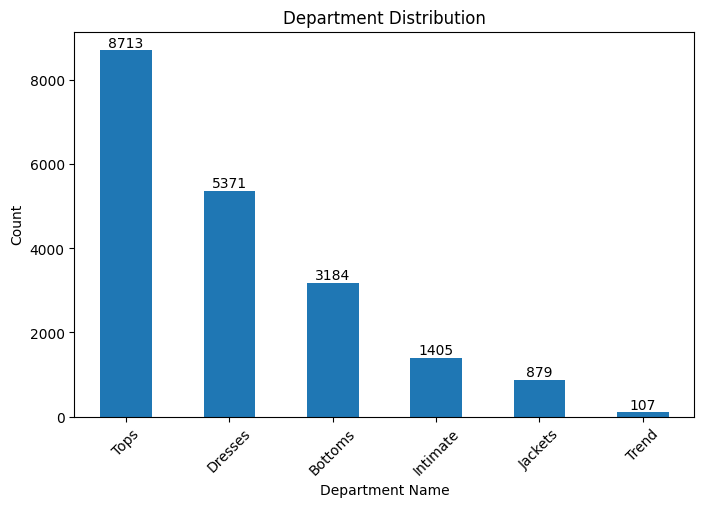

In [20]:
# Department
plt.figure(figsize=(8, 5))
ax = reviews['Department Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Department Distribution")
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show();

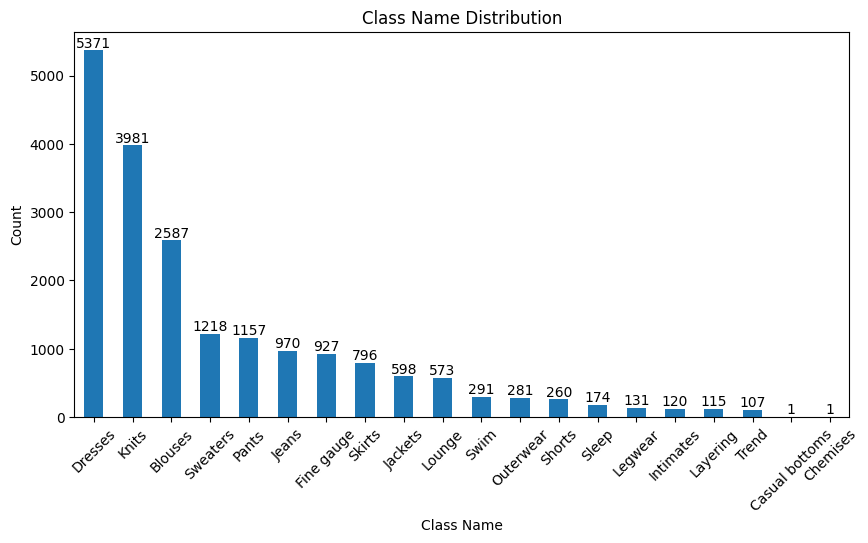

In [21]:
# Class Name
plt.figure(figsize=(10, 5))  # Adjust figure size
ax = reviews['Class Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Class Name Distribution")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show();

## Class Name Distribution Analysis
The Dresses category has the highest number of reviews (5371), followed by Knits (3981) and Blouses (2587). Other categories like Chemises (1) and Casual Bottoms (1) have extremely low engagement.

## Key Insights:¶
- Top-Selling Items: Dresses, Knits, and Blouses dominate in reviews, suggesting they are the most popular.
- Low Interest Categories: Items like Chemises, Casual Bottoms, and Trend have minimal reviews, indicating low sales or availability.
- Marketing Focus: Efforts can be made to promote underperforming categories to improve visibility and sales.

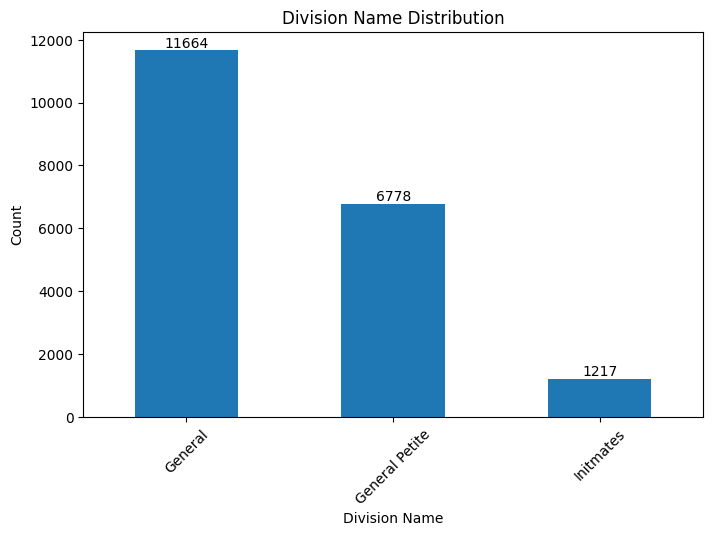

In [22]:
# Division name
plt.figure(figsize=(8, 5))
ax = reviews['Division Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')
plt.title("Division Name Distribution")
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show();

## Division Name Distribution Analysis
The General division has the highest number of reviews (11664), followed by General Petite (6778). The Intimates division has the least reviews (1217), indicating lower engagement.

## Key Insights:
- General Dominance: Most reviews come from the General division, indicating a broader customer base.
- Petite Market Presence: General Petite has significant engagement, showing demand for petite-sized clothing.
- Low Intimates Reviews: The Intimates category has fewer reviews, suggesting either lower sales or customer hesitation in reviewing such items.

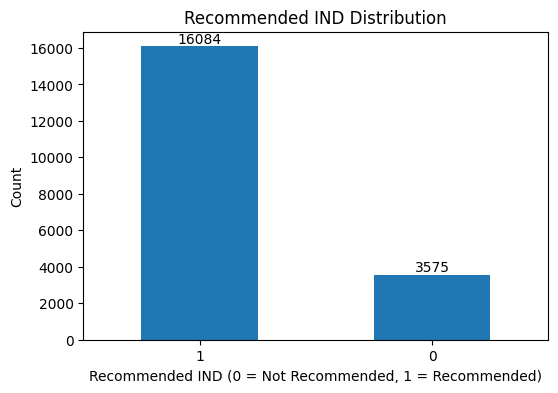

In [23]:
# Recommended IND
plt.figure(figsize=(6, 4))  # Adjust figure size
ax = reviews['Recommended IND'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Recommended IND Distribution")
plt.xlabel("Recommended IND (0 = Not Recommended, 1 = Recommended)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show();

Recommendation Distribution Analysis
The majority of reviews (16084) recommend the product (Recommended IND = 1), while only 3575 reviews do not recommend it (Recommended IND = 0).

Key Insights:
- High Recommendation Rate: About 82% of customers recommend the products, indicating overall customer satisfaction.
- Minor Negative Feedback: Only 18% of customers do not recommend the products, suggesting areas for potential improvement.
- Quality Assurance: Understanding the characteristics of non-recommended products (e.g., low ratings, specific categories) can help improve quality and sales.

## Word Cloud visualization

In [24]:
!pip install wordcloud
from wordcloud import WordCloud

In [25]:
recommended_text = ' '.join(reviews[reviews['Recommended IND'] == 1]['Text'])
not_recommended_text = ' '.join(reviews[reviews['Recommended IND'] == 0]['Text'])

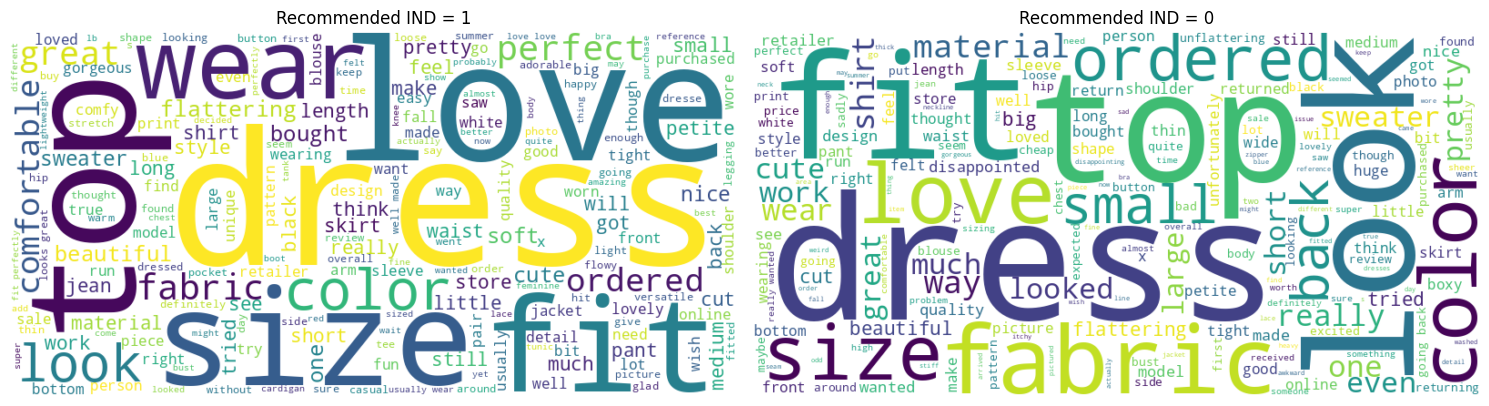

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Recommended IND = 1
wordcloud_recommended = WordCloud(width=800, height=400, background_color='white').generate(recommended_text)
ax[0].imshow(wordcloud_recommended, interpolation='bilinear')
ax[0].set_title('Recommended IND = 1')
ax[0].axis('off')

# Recommended IND = 0
wordcloud_not_recommended = WordCloud(width=800, height=400, background_color='white').generate(not_recommended_text)
ax[1].imshow(wordcloud_not_recommended, interpolation='bilinear')
ax[1].set_title('Recommended IND = 0')
ax[1].axis('off')

plt.tight_layout()
plt.show();

Checking out the average ratings by groups

/tmp/ipython-input-27-3071412912.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_ratings = reviews.groupby('Age_Group')['Rating'].mean().reset_index()
/tmp/ipython-input-27-3071412912.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age_Group', y='Rating', data=age_group_ratings, palette = 'crest')


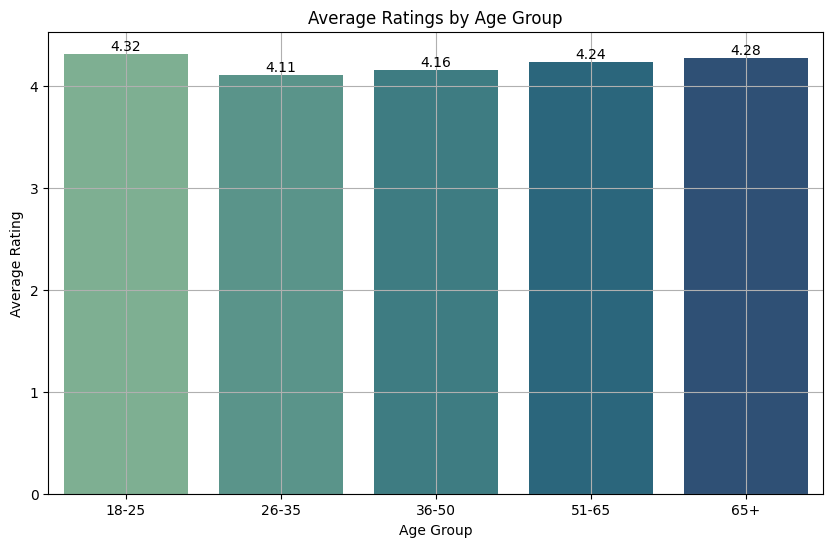

In [27]:
bins = [18, 25, 35, 50, 65, 100]
labels = ['18-25', '26-35', '36-50', '51-65', '65+']
reviews['Age_Group'] = pd.cut(reviews['Age'], bins=bins, labels=labels, right=False)

# Grouping by mean ratings
age_group_ratings = reviews.groupby('Age_Group')['Rating'].mean().reset_index()


# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Age_Group', y='Rating', data=age_group_ratings, palette = 'crest')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')
plt.title('Average Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show();


- The 18-25 and 65+ age groups provided the highest average ratings.
- The 26-35 age group has the lowest average rating.
- Overall, ratings remain relatively consistent across age groups, with slight variations.

### Recommended IND and various categorical column's chi, and association tests.

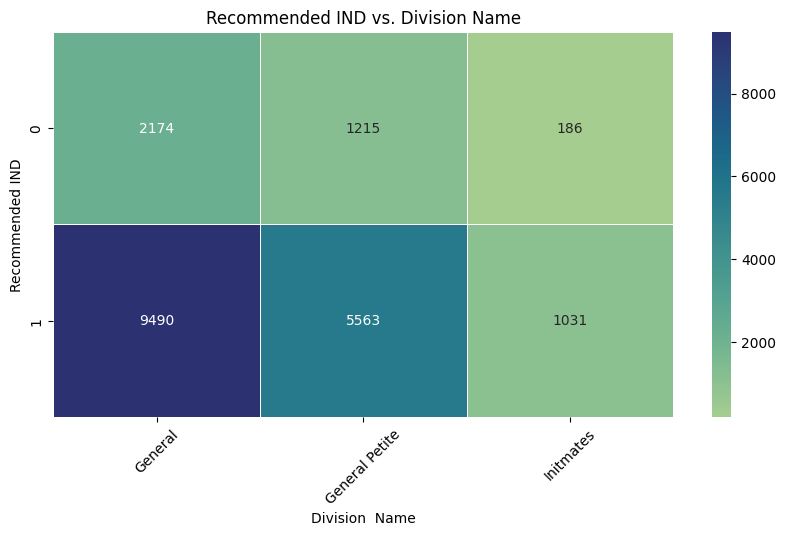

In [28]:
crosstab = pd.crosstab(reviews['Recommended IND'], reviews['Division Name'])
plt.figure(figsize = (10, 5))
sns.heatmap(crosstab, annot = True, cmap = 'crest', linewidths = 0.5, fmt = 'd')
plt.title("Recommended IND vs. Division Name")
plt.xlabel("Division  Name")
plt.ylabel("Recommended IND")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show();

In [29]:
# Statistical tests.
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crosstab)

# Print results
print(f'Chi-square Statistic: {chi2:.4f}')
print(f'Degrees of Freedom: {dof}')
print(f'P-value: {p:.4f}')

# Decision Rule
alpha = 0.05  # Significance level
if p < alpha:
    print("❌ Reject the Null Hypothesis (H₀) → There is a significant association between Division Name and Recommendation.")
else:
    print("✅ Fail to Reject the Null Hypothesis (H₀) → No significant association found between Division Name and Recommendation.")

Chi-square Statistic: 8.8055
Degrees of Freedom: 2
P-value: 0.0122
❌ Reject the Null Hypothesis (H₀) → There is a significant association between Division Name and Recommendation.


In [30]:
!pip install transformers
import pandas as pd
import re
import torch
from transformers import BertTokenizer

In [31]:
!pip install swifter
import swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=3ca2434ddf59b67c85e04c0b97455df7eb3ad1b54a25f9fbab811de00b5cb026
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [32]:
reviews.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text,Age_Group
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,51-65
3,50,5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",51-65
4,47,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,36-50
5,49,2,0,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...,36-50
6,39,5,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...,36-50


In [33]:
# Cleaning the text column.
def clean_text(text):
    if pd.isnull(text):  # Handle missing values
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    return text.strip()

reviews['Text'] = reviews['Text'].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/19659 [00:00<?, ?it/s]

In [63]:
reviews.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text,Age_Group
2,60,3,0,General,Dresses,Dresses,some major design flaws i had such high hopes ...,51-65
3,50,5,1,General Petite,Bottoms,Pants,my favorite buy i love love love this jumpsuit...,51-65
4,47,5,1,General,Tops,Blouses,flattering shirt this shirt is very flattering...,36-50
5,49,2,0,General,Dresses,Dresses,not for the very petite i love tracy reese dre...,36-50
6,39,5,1,General Petite,Tops,Knits,cagrcoal shimmer fun i aded this in my basket ...,36-50


In [64]:
from torch.utils.data import Dataset as TorchDataset

class ReviewDataset(TorchDataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.input_ids[idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.attention_mask[idx], dtype=torch.long),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Create instances of the custom dataset
train_dataset = ReviewDataset(train_input_ids, train_attention_mask, train_labels)
test_dataset = ReviewDataset(test_input_ids, test_attention_mask, test_labels)

print("Custom Train Dataset:", train_dataset)
print("Custom Test Dataset:", test_dataset)

Custom Train Dataset: <__main__.ReviewDataset object at 0x7aae5d663890>
Custom Test Dataset: <__main__.ReviewDataset object at 0x7aacfdf75050>


In [65]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

# Initialize the data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=data_collator)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=data_collator)

print("Train DataLoader:", train_dataloader)
print("Test DataLoader:", test_dataloader)

Train DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7aace8321490>
Test DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7aace8207e50>


In [66]:
import torch.optim as optim
import torch.nn as nn
from transformers import DistilBertForSequenceClassification

# Define the model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Define the optimizer
optimizer = optim.AdamW(model.parameters(), lr=5e-5) # You can adjust the learning rate

# Define the loss function for binary classification
criterion = nn.CrossEntropyLoss() # Suitable for binary classification with 2 labels

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Model defined and moved to {device}")
print("Optimizer defined:", optimizer)
print("Loss function defined:", criterion)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model defined and moved to cuda
Optimizer defined: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 5e-05
    maximize: False
    weight_decay: 0.01
)
Loss function defined: CrossEntropyLoss()


In [67]:

from tqdm.notebook import tqdm

# Number of epochs
num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    # Iterate over the training data
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        # Move batch to the appropriate device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        total_loss += loss.item()

    # Print average loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}")

print("Training finished!")

Epoch 1/3:   0%|          | 0/1106 [00:00<?, ?it/s]

Epoch 1/3, Average Training Loss: 0.2266


Epoch 2/3:   0%|          | 0/1106 [00:00<?, ?it/s]

Epoch 2/3, Average Training Loss: 0.1455


Epoch 3/3:   0%|          | 0/1106 [00:00<?, ?it/s]

Epoch 3/3, Average Training Loss: 0.1030
Training finished!


**Reasoning**:
We are implementing an evaluation function to assess the performance of the trained model on the test dataset. This includes calculating the loss, various metrics like accuracy, precision, recall, and F1 score, and generating a confusion matrix. This is the fifth step of our plan.

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

def evaluate_model(model, dataloader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for batch in tqdm(dataloader, desc="Evaluating"):
            # Move batch to the appropriate device
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item()

            # Get predictions
            predictions = torch.argmax(logits, dim=-1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    avg_eval_loss = total_loss / len(dataloader)

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    cm = confusion_matrix(all_labels, all_predictions)
    sns.heatmap(cm, annot = True, cmap = 'crest')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show();
    print(f"Average Evaluation Loss: {avg_eval_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)

    return avg_eval_loss, accuracy, precision, recall, f1, cm

# Example usage (you can call this after each training epoch)
# evaluate_model(model, test_dataloader, criterion, device)

Evaluating:   0%|          | 0/123 [00:00<?, ?it/s]

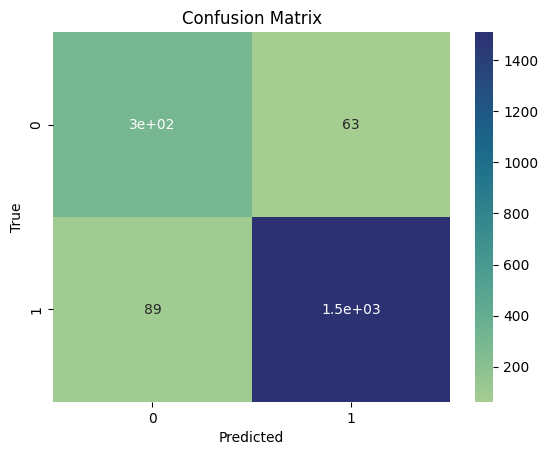

Average Evaluation Loss: 0.1750
Accuracy: 0.9227
Precision: 0.9599
Recall: 0.9443
F1 Score: 0.9521
Confusion Matrix:
 [[ 304   63]
 [  89 1510]]


(0.17499467390551557,
 0.9226856561546287,
 0.9599491417673236,
 0.9443402126328956,
 0.9520807061790668,
 array([[ 304,   63],
        [  89, 1510]]))

In [72]:
evaluate_model(model, test_dataloader, criterion, device)

**Reasoning**:
We are saving the trained model's state dictionary to a file so that it can be loaded and reused later without retraining. This is the sixth step of our plan.

In [74]:
import os
# Define the path where you want to save the model
model_save_path = "/content/drive/MyDrive/E_commerce_reviews/model/distilbert_review_model.pth"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/E_commerce_reviews/model/distilbert_review_model.pth


In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
# Tokenize the 'Text' column in the DataFrames
train_tokenized = train_df['Text'].apply(lambda x: tokenizer(x, padding=True, truncation=True))
test_tokenized = test_df['Text'].apply(lambda x: tokenizer(x, padding=True, truncation=True))

# Extract input_ids and attention_mask from the tokenized results
train_input_ids = [x['input_ids'] for x in train_tokenized]
train_attention_mask = [x['attention_mask'] for x in train_tokenized]
train_labels = train_df['Recommended IND'].tolist()

test_input_ids = [x['input_ids'] for x in test_tokenized]
test_attention_mask = [x['attention_mask'] for x in test_tokenized]
test_labels = test_df['Recommended IND'].tolist()

In [76]:
import torch

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

text = "This shirt is super comfortable and fits well!"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

print(inputs)

{'input_ids': tensor([[  101,  2023,  3797,  2003,  3565,  6625,  1998, 16142,  2092,   999,
           102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [78]:
from transformers import DistilBertForSequenceClassification
import torch

# Define the path to the saved model state dictionary
model_save_path = "/content/drive/MyDrive/E_commerce_reviews/model/distilbert_review_model.pth"

# Instantiate the model architecture (with the same configuration as the trained model)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Load the saved state dictionary into the model
model.load_state_dict(torch.load(model_save_path))

# Set the model to evaluation mode
model.eval()

# Assuming 'inputs' is already defined from tokenizing a sample sentence
with torch.no_grad():
    outputs = model(**inputs)

print("Inference successful!")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Inference successful!


In [81]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import torch.nn.functional as F

# Load tokenizer and model
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model.eval()

# Sample input
text = "The worst fitting ever!!"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Predict
with torch.no_grad():
    outputs = model(**inputs)
    probs = F.softmax(outputs.logits, dim=1)
    pred = torch.argmax(probs, dim=1).item()

# Label mapping
print("Predicted sentiment:", pred)

Predicted sentiment: 0


In [82]:
pred

0